In [1]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from tqdm import tqdm
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_linear, model_logistic
import numpy as np

In [2]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'

In [3]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [4]:
X_p, (x_mean, x_std) = feature_processing.process_X(X, 3)
X_t_p, _ = feature_processing.process_X(X_t, 3, (x_mean, x_std))

100%|██████████| 5/5 [00:51<00:00,  8.78s/it]


100%|██████████| 3/3 [00:31<00:00, 10.34s/it]


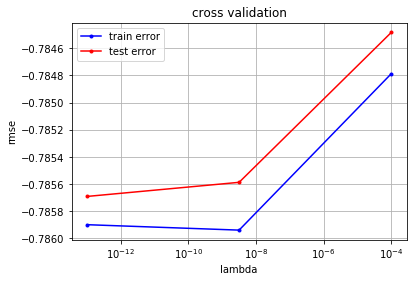

In [5]:
#Linear
model = implementation.ridge_regression
loss = model_linear.compute_accuracy_loss

lambdas = np.logspace(-13, -4, 3)

idx_min_l, rmse_all_l, lambdas_l = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1,
                                                            k_fold = 3, lambdas = lambdas, do_plot = True, do_tqdm = True)

In [7]:
lambda_ = lambdas_l[idx_min_l]
print(lambda_)
w, l = implementation.ridge_regression(y, X_p, lambda_ = 0)

1e-13


In [8]:
#Logistic
y_01 = helpers.y_to_01(np.array([y]).T)
np.random.seed(1)
w0 = np.zeros((X_p.shape[1], 1))

 80%|████████  | 8/10 [00:04<00:01,  1.90epoch/s, acc=-0.79, diff=1.65e+05, grad=93.5, loss=1.39e+05, w=0]


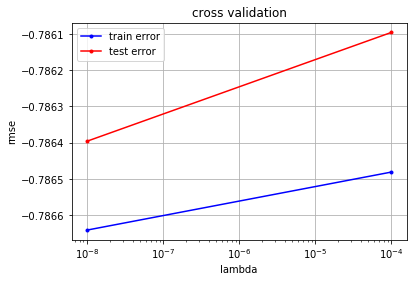

In [10]:
model = implementation.reg_logistic_regression_newton_batch
model_args = {'initial_w': w0, 'max_iters': 10, 'gamma': 1e-5, 'debug': False,
              'batch_size': 50000}
loss = model_linear.compute_accuracy_loss

lambdas = np.logspace(-8, -4, 2)

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p, y_01, model, loss, kw_model = model_args, seed = 1,
                                                            k_fold = 5, lambdas = lambdas, do_plot = True, do_tqdm = False)

In [13]:
lambda_ = lambdas[idx_min]
w, l = model(y_01, X_p, lambda_, **model_args)
print(lambda_)

 90%|█████████ | 9/10 [00:04<00:00,  1.86epoch/s, acc=-0.79, diff=1.72e+05, grad=1.12e+04, loss=1.73e+05, w=0.39]

1e-08


In [14]:
y_pred = proj1_helpers.predict_labels(w, X_t_p)

In [15]:
output_path = '../data/example_submission.csv'
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)

In [16]:
np.mean(y_pred>0)
tqdm.get_lock().locks = []